In [44]:
import sys
import pandas as pd
import numpy as np
import kmapper as km
import sklearn
from sklearn import ensemble

In [45]:
df = pd.read_csv("../data/breast-cancer.csv")

In [46]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [47]:
feature_names = [c for c in df.columns if c not in ["id", "diagnosis"]]
df["diagnosis"] = df["diagnosis"].apply(lambda x: 1 if x == "M" else 0)
X = np.array(df[feature_names].fillna(0))  # quick and dirty imputation
y = np.array(df["diagnosis"])

# Mapper algoritam na 3 dimenzije

In [48]:
model = ensemble.IsolationForest(random_state=1729)
model.fit(X)
lens1 = model.decision_function(X).reshape((X.shape[0], 1))

In [49]:
mapper = km.KeplerMapper(verbose=3)
lens2 = mapper.fit_transform(X, projection="l2norm")

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: l2norm
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (569, 31)

..Projecting data using: l2norm

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))



In [50]:
lens = np.c_[lens1, lens2]

In [51]:
graph = mapper.map(lens,
                   X,
                   cover=km.Cover(n_cubes=15, perc_overlap=0.4),
                   clusterer=sklearn.cluster.KMeans(n_clusters=2,
                                                    random_state=1618033))

Mapping on data shaped (569, 31) using lens shaped (569, 2)

Minimal points in hypercube before clustering: 2
Creating 225 hypercubes.
Cube_0 is empty.

Cube_1 is empty.

Cube_2 is empty.

Cube_3 is empty.

Cube_4 is empty.

Cube_5 is empty.

Cube_6 is empty.

   > Found 2 clusters.

Cube_8 is empty.

Cube_9 is empty.

Cube_10 is empty.

Cube_11 is empty.

Cube_12 is empty.

   > Found 2 clusters.

Cube_14 is empty.

Cube_15 is empty.

Cube_16 is empty.

Cube_17 is empty.

Cube_18 is empty.

   > Found 2 clusters.

Cube_20 is empty.

Cube_21 is empty.

   > Found 2 clusters.

Cube_23 is empty.

   > Found 2 clusters.

   > Found 2 clusters.

Cube_26 is empty.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

Cube_31 is empty.

Cube_32 is empty.

Cube_33 is empty.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

Cube_38 is empty.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 cl

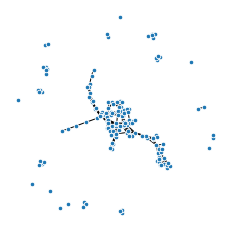

In [52]:
import matplotlib.pyplot as plt
km.draw_matplotlib(graph)
plt.show()

# TSNE 2 dimenzije

In [53]:
from sklearn.manifold import TSNE

In [54]:
mdl = TSNE(perplexity=35, n_iter=10000)
X_transformed = mdl.fit_transform(X)
print(X_transformed)

[[-44.52443  -22.510624]
 [-42.251823 -23.819324]
 [-38.715675 -21.272865]
 ...
 [-25.888222 -10.634695]
 [-41.28238  -22.034643]
 [ 53.464184  15.304272]]


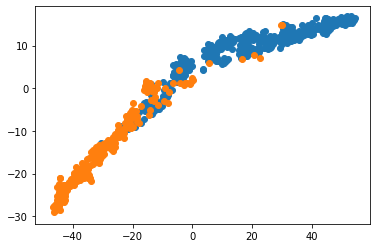

In [55]:
for i in range(2):
    plt.scatter(X_transformed[df['diagnosis'] == i, 0], X_transformed[df['diagnosis'] == i, 1])

# TSNE 3 dimenzije 

In [56]:
from mpl_toolkits.mplot3d import Axes3D

In [57]:
mdl = TSNE(n_components=3,perplexity=35, n_iter=10000)
X_transformed = mdl.fit_transform(X)
print(X_transformed)
X_transformed.shape

[[  6.6265945   6.3615127  -8.713253 ]
 [  7.1242094   7.718576   -7.606054 ]
 [  8.112829    6.105838   -5.87666  ]
 ...
 [  9.4493475   1.6546183   1.75341  ]
 [  7.5958138   6.972672   -6.8181477]
 [ -4.4676833  -5.2464323 -15.304705 ]]


(569, 3)

/home/nina/.local/lib/python3.6/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


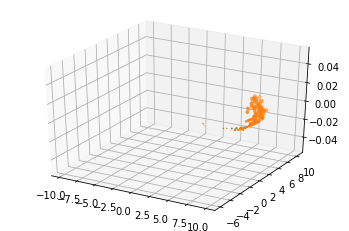

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(2):
    plt.scatter(X_transformed[df['diagnosis'] == i, 0], X_transformed[df['diagnosis'] == i, 1], X_transformed[df['diagnosis'] == i, 1] )
plt.savefig("cancer-tsne-reference.csv.png")
plt.show()

# Autoencoder 2 dimenzije

In [59]:
from keras.layers import Input, Dense
from keras.models import Model

In [60]:
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [61]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [62]:
df = pd.read_csv('../data/breast-cancer.csv')

In [63]:
feature_names = [c for c in df.columns if c not in ["id", "diagnosis"]]
df["diagnosis"] = df["diagnosis"].apply(lambda x: 1 if x == "M" else 0)

In [64]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

/home/nina/.local/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:375: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/home/nina/.local/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:376: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [65]:
X = np.array(df[feature_names].fillna(0))  # quick and dirty imputation
y = np.array(df["diagnosis"])

In [66]:
X.shape

(569, 31)

In [67]:
input_dim = X.shape[1]
input_dim

31

In [68]:
encoding_dim = 2

In [69]:
input_layer = Input(shape=(input_dim, ))
encoder_layer_1 = Dense(500, activation="sigmoid", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder_layer_2 = Dense(450, activation="sigmoid")(encoder_layer_1)
encoder_layer_3 = Dense(encoding_dim, activation="sigmoid")(encoder_layer_2)

In [70]:
encoder = Model(inputs=input_layer, outputs=encoder_layer_3)

In [71]:
encoded_data = pd.DataFrame(encoder.predict(X))
encoded_data.columns = ['factor_1', 'factor_2']

In [72]:
joined = encoded_data.join(df["diagnosis"])

In [73]:
x1 = joined[joined['diagnosis'] == 1]
x1
x0 = joined[joined['diagnosis'] == 0]

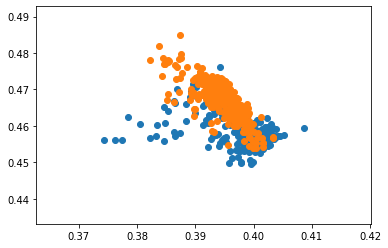

In [74]:
plt.scatter(x1['factor_1'], x1['factor_2'])
plt.scatter(x0['factor_1'], x0['factor_2'])

# SOM 2 dimenzije

In [75]:
import matplotlib.pyplot as plt
from minisom import MiniSom

som = MiniSom(6, 6, 31, sigma=0.3, learning_rate=0.5) # initialization of 6x6 SOM
dff = df[feature_names].fillna(0)
som.train_random(dff.values, 100)

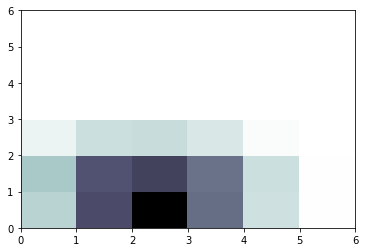

In [76]:
plt.pcolor(som.distance_map().T, cmap='bone_r')

# Autoencoder 3 dimenzije

In [77]:
encoding_dim = 3

In [78]:
input_layer = Input(shape=(input_dim, ))
encoder_layer_1 = Dense(500, activation="sigmoid", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder_layer_2 = Dense(450, activation="sigmoid")(encoder_layer_1)
encoder_layer_3 = Dense(encoding_dim, activation="sigmoid")(encoder_layer_2)

In [79]:
encoder = Model(inputs=input_layer, outputs=encoder_layer_3)

In [80]:
encoded_data = pd.DataFrame(encoder.predict(X))
encoded_data.columns = ['factor_1', 'factor_2', 'factor_3']

In [81]:
joined = encoded_data.join(df["diagnosis"])

In [82]:
x1 = joined[joined['diagnosis'] == 1]
x0 = joined[joined['diagnosis'] == 0]

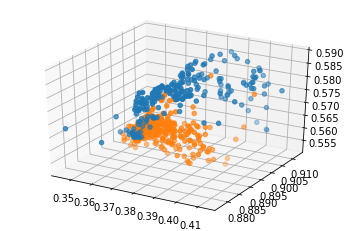

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1['factor_1'],x1['factor_2'],x1['factor_3'])
ax.scatter(x0['factor_1'],x0['factor_2'],x0['factor_3'])
plt.savefig("cancer3-reference.csv.png")
plt.show()